In [1]:
num = 7 + 8;

In [2]:
s = :num

:num

In [3]:
typeof(s)

Symbol

In [4]:
supertype(Symbol)

Any

In [5]:
s

:num

In [6]:
eval(s)

15

In [7]:
Symbol("num")

:num

In [8]:
Symbol("num", 2)

:num2

In [9]:
Symbol("new", "num")

:newnum

In [10]:
:(a + b)

:(a + b)

In [11]:
ex = :(a + b)

:(a + b)

In [12]:
typeof(ex)

Expr

In [13]:
supertype(Expr)

Any

In [14]:
eval(ex)

UndefVarError: UndefVarError: a not defined

In [15]:
a = 10
b = 23
eval(ex)

33

In [16]:
Meta.parse("a + b")

:(a + b)

In [17]:
:(
    begin
        c = a + b
        d = c^2
        e = π*d
    end
)

quote
    #= /Users/sp/dev_root/my_learnings/Julia/section_9_metaprogramming/63_symbols_and_expressions.ipynb:3 =#
    c = a + b
    #= /Users/sp/dev_root/my_learnings/Julia/section_9_metaprogramming/63_symbols_and_expressions.ipynb:4 =#
    d = c ^ 2
    #= /Users/sp/dev_root/my_learnings/Julia/section_9_metaprogramming/63_symbols_and_expressions.ipynb:5 =#
    e = π * d
end

In [18]:
quote
    c = a + b
    d = c^2
    e = π*d
end

quote
    #= /Users/sp/dev_root/my_learnings/Julia/section_9_metaprogramming/63_symbols_and_expressions.ipynb:2 =#
    c = a + b
    #= /Users/sp/dev_root/my_learnings/Julia/section_9_metaprogramming/63_symbols_and_expressions.ipynb:3 =#
    d = c ^ 2
    #= /Users/sp/dev_root/my_learnings/Julia/section_9_metaprogramming/63_symbols_and_expressions.ipynb:4 =#
    e = π * d
end

In [19]:
dump(ex)

Expr
  head: Symbol call
  args: Array{Any}((3,))
    1: Symbol +
    2: Symbol a
    3: Symbol b


In [20]:
propertynames(ex)

(:head, :args)

In [21]:
ex.head

:call

In [22]:
ex.args

3-element Vector{Any}:
 :+
 :a
 :b

In [23]:
Expr(:call, :+, :a, :b)

:(a + b)

In [24]:
ex2 = :(3x - 7y + z*t)

:((3x - 7y) + z * t)

In [25]:
dump(ex2)

Expr
  head: Symbol call
  args: Array{Any}((3,))
    1: Symbol +
    2: Expr
      head: Symbol call
      args: Array{Any}((3,))
        1: Symbol -
        2: Expr
          head: Symbol call
          args: Array{Any}((3,))
            1: Symbol *
            2: Int64 3
            3: Symbol x
        3: Expr
          head: Symbol call
          args: Array{Any}((3,))
            1: Symbol *
            2: Int64 7
            3: Symbol y
    3: Expr
      head: Symbol call
      args: Array{Any}((3,))
        1: Symbol *
        2: Symbol z
        3: Symbol t


In [26]:
ex2.args

3-element Vector{Any}:
 :+
 :(3x - 7y)
 :(z * t)

In [27]:
ex2.args[1]

:+

In [28]:
ex2.args[2]

:(3x - 7y)

In [29]:
ex2.args[3]

:(z * t)

In [30]:
ex2.args[2].args

3-element Vector{Any}:
 :-
 :(3x)
 :(7y)

In [32]:
# Add GraphRecipes package

In [34]:
using GraphRecipes, Plots

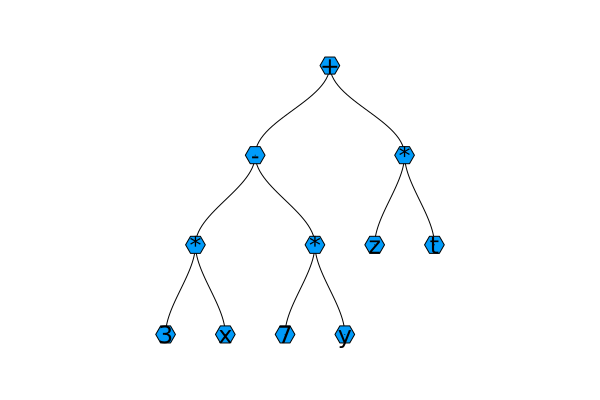

In [35]:
plot(ex2, fontsize=16)

In [36]:
exp = :(
    function power(a, b)
        return a^b
    end
)

:(function power(a, b)
      #= /Users/sp/dev_root/my_learnings/Julia/section_9_metaprogramming/63_symbols_and_expressions.ipynb:2 =#
      #= /Users/sp/dev_root/my_learnings/Julia/section_9_metaprogramming/63_symbols_and_expressions.ipynb:3 =#
      return a ^ b
  end)

In [37]:
exp.head

:function

In [38]:
exp2 = :(
    for i in 1:5
        println(i)
    end
)

:(for i = 1:5
      #= /Users/sp/dev_root/my_learnings/Julia/section_9_metaprogramming/63_symbols_and_expressions.ipynb:3 =#
      println(i)
      #= /Users/sp/dev_root/my_learnings/Julia/section_9_metaprogramming/63_symbols_and_expressions.ipynb:4 =#
  end)

In [39]:
exp2.head

:for

In [40]:
expr3 = :(
    if a < b
        println(a)
    else
        println(b)
    end
)

:(if a < b
      #= /Users/sp/dev_root/my_learnings/Julia/section_9_metaprogramming/63_symbols_and_expressions.ipynb:3 =#
      println(a)
  else
      #= /Users/sp/dev_root/my_learnings/Julia/section_9_metaprogramming/63_symbols_and_expressions.ipynb:5 =#
      println(b)
  end)

In [42]:
expr3.head

:if

In [43]:
:([x, y, z, t]) |> dump

Expr
  head: Symbol vect
  args: Array{Any}((4,))
    1: Symbol x
    2: Symbol y
    3: Symbol z
    4: Symbol t


In [44]:
mutable struct Point
    a
    b
end

In [45]:
Expr(:struct, true, :Point, Expr(:block, :a, :b))

:(mutable struct Point
      a
      b
  end)

In [46]:
mutable struct Point1
    a::Float64
    b::Float64
end

In [47]:
Expr(:struct, true, :Point1,
    Expr(:block,
        Expr(:(::), :a, :Float64),
        Expr(:(::), :b, :Float64)))

:(mutable struct Point1
      a::Float64
      b::Float64
  end)

In [48]:
:(mutable struct Point
    a::Float64
    b::Float64
end) |> dump

Expr
  head: Symbol struct
  args: Array{Any}((3,))
    1: Bool true
    2: Symbol Point
    3: Expr
      head: Symbol block
      args: Array{Any}((4,))
        1: LineNumberNode
          line: Int64 2
          file: Symbol /Users/sp/dev_root/my_learnings/Julia/section_9_metaprogramming/63_symbols_and_expressions.ipynb
        2: Expr
          head: Symbol ::
          args: Array{Any}((2,))
            1: Symbol a
            2: Symbol Float64
        3: LineNumberNode
          line: Int64 3
          file: Symbol /Users/sp/dev_root/my_learnings/Julia/section_9_metaprogramming/63_symbols_and_expressions.ipynb
        4: Expr
          head: Symbol ::
          args: Array{Any}((2,))
            1: Symbol b
            2: Symbol Float64


In [49]:
:(x - 3y)

:(x - 3y)

In [50]:
x = 5

5

In [51]:
:($x - 5y)

:(5 - 5y)

In [52]:
:(:x) |> dump

QuoteNode
  value

: Symbol x


In [53]:
:(a = :x) |> dump

Expr
  head: Symbol =
  args: Array{Any}((2,))
    1: Symbol a
    2: QuoteNode
      value: Symbol x


In [54]:
ref = QuoteNode(:variable)

:(:variable)

In [55]:
:(var = $ref)

:(var = :variable)

In [56]:
ref2 = :variable2

:variable2

In [57]:
:(var2 = $ref2)

:(var2 = variable2)

In [58]:
:(ref = :var) |> dump

Expr
  head: Symbol =
  args: Array{Any}((2,))
    1: Symbol ref
    2: QuoteNode
      value: Symbol var


In [59]:
var = 7

7

In [60]:
:(ref = :($var))

:(ref = $(Expr(:quote, :($(Expr(:$, :var))))))

In [61]:
:(ref = :($($var)))

:(ref = $(Expr(:quote, :($(Expr(:$, 7))))))